In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('data/container.csv')
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T
0,Busan,2018-01-01,True,165,273,61282,15753,59612,13995,147,67,3862353
1,Busan,2018-01-01,False,161,133,338680,74981,441504,83605,2879,705,26086071
2,Busan,2018-02-01,True,131,180,58404,14942,55317,12530,89,18,3507757
3,Busan,2018-02-01,False,197,130,329184,71048,440318,84009,3022,913,26385908
4,Busan,2018-03-01,True,90,176,62388,14732,59900,13404,94,116,3782328


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Harbor       696 non-null    object
 1   Date         696 non-null    object
 2   isKorean     696 non-null    bool  
 3   Full_10      696 non-null    int64 
 4   Empty_10     696 non-null    int64 
 5   Full_20      696 non-null    int64 
 6   Empty_20     696 non-null    int64 
 7   Full_40      696 non-null    int64 
 8   Empty_40     696 non-null    int64 
 9   Full_other   696 non-null    int64 
 10  Empty_other  696 non-null    int64 
 11  R/T          696 non-null    int64 
dtypes: bool(1), int64(9), object(2)
memory usage: 60.6+ KB


In [96]:
df["total_containers"] = (
    df["Full_10"] + df["Empty_10"] +
    df["Full_20"] + df["Empty_20"] +
    df["Full_40"] + df["Empty_40"] +
    df["Full_other"] + df["Empty_other"]
)

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [97]:
df.head()

,Harbor,Date,isKorean,Full_10,Empty_10,Full_20,Empty_20,Full_40,Empty_40,Full_other,Empty_other,R/T,total_containers,Year,Month
0,Busan,2018-01-01,True,165,273,61282,15753,59612,13995,147,67,3862353,151294,2018,1
1,Busan,2018-01-01,False,161,133,338680,74981,441504,83605,2879,705,26086071,942648,2018,1
2,Busan,2018-02-01,True,131,180,58404,14942,55317,12530,89,18,3507757,141611,2018,2
3,Busan,2018-02-01,False,197,130,329184,71048,440318,84009,3022,913,26385908,928821,2018,2
4,Busan,2018-03-01,True,90,176,62388,14732,59900,13404,94,116,3782328,150900,2018,3


In [ ]:
# checking if any null values
df.isnull().sum()

Harbor              0
Date                0
isKorean            0
Full_10             0
Empty_10            0
Full_20             0
Empty_20            0
Full_40             0
Empty_40            0
Full_other          0
Empty_other         0
R/T                 0
total_containers    0
Year                0
Month               0
dtype: int64

### Hitung rata-rata kapasitas kontainer setiap pelabuhan per tahun

In [99]:
avg_capacity_per_year = df.groupby(["Harbor", "Year"])["total_containers"].mean().reset_index()
avg_capacity_per_year["total_containers"] = avg_capacity_per_year["total_containers"].round(1)
# avg_capacity_per_year = avg_capacity_per_year.rename(columns={'A': 'Alpha', 'B': 'Beta'})
avg_capacity_per_year

,Harbor,Year,total_containers
0,Busan,2018,580607.7
1,Busan,2019,583041.8
2,Busan,2020,570537.7
3,Daesan,2018,2896.2
4,Daesan,2019,2235.5
5,Daesan,2020,2874.3
6,"East Sea, Mukho",2018,53.7
7,"East Sea, Mukho",2019,50.7
8,"East Sea, Mukho",2020,0.0
9,Gunsan,2018,2261.5


### Identifikasi Pelabuhan dengan Kapasitas Tertinggi per Tahun

Pelabuhan yang memiliki kapasitas/jumlah kontainer tertinggi per tahunnya adalah pada pelabuhan Busan

In [100]:
top_ports_per_year = avg_capacity_per_year.loc[avg_capacity_per_year.groupby("Year")["total_containers"].idxmax()]
print(top_ports_per_year)

  Harbor  Year  total_containers
0  Busan  2018          580607.7
1  Busan  2019          583041.8
2  Busan  2020          570537.7


C:\Users\fitra\AppData\Local\Temp\ipykernel_22820\699941898.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Month", y="total_containers", hue="Harbor", ci=None, marker="o")


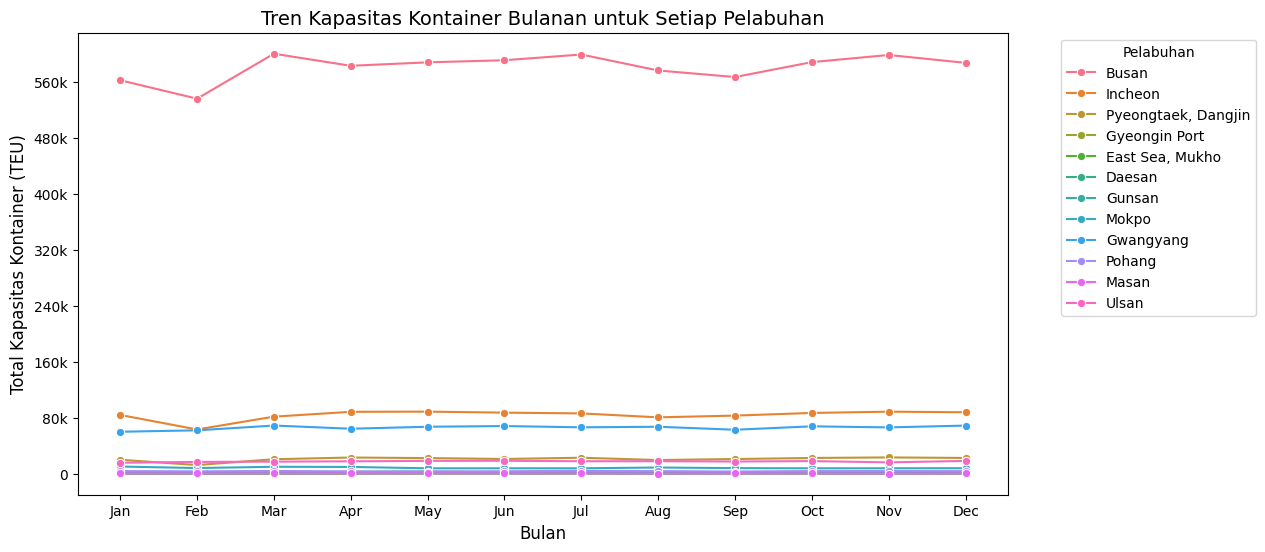

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="total_containers", hue="Harbor", ci=None, marker="o")

# add format to yaxis, -> k = 1000
def format_k(x, pos):
    if x == 0:
        return "0"
    return f"{int(x/1000)}k"

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_k))
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(nbins=10, integer=True))

plt.title("Tren Kapasitas Kontainer Bulanan untuk Setiap Pelabuhan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Kapasitas Kontainer (TEU)", fontsize=12)
plt.xticks(range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Pelabuhan", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [102]:
avg_capacity_per_year = avg_capacity_per_year.rename(columns={'total_containers': 'avg_total_containers'})
avg_capacity_per_year.to_csv('port_analysis_results.csv', index=False, encoding='utf-8')